In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
# Load the data
x_train = np.loadtxt('./x_train.csv', delimiter=',')
x_test = np.loadtxt('./x_test.csv', delimiter=',')
y_train = np.loadtxt('./y_train.csv', delimiter=',')
y_test = np.loadtxt('./y_test.csv', delimiter=',')

In [ ]:
# One-hot encode the target variable for multi-class classification
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:

# Define a function to create and train a neural network with a given learning rate
def train_neural_network(learning_rate):
    # Define the neural network architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=(14,)),
        tf.keras.layers.Dense(40, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)

    return model, history


In [ ]:

# Train three neural networks with different learning rates
learning_rates = [1.0, 0.1, 0.001]
models = []
histories = []

for lr in learning_rates:
    model, history = train_neural_network(lr)
    models.append(model)
    histories.append(history)


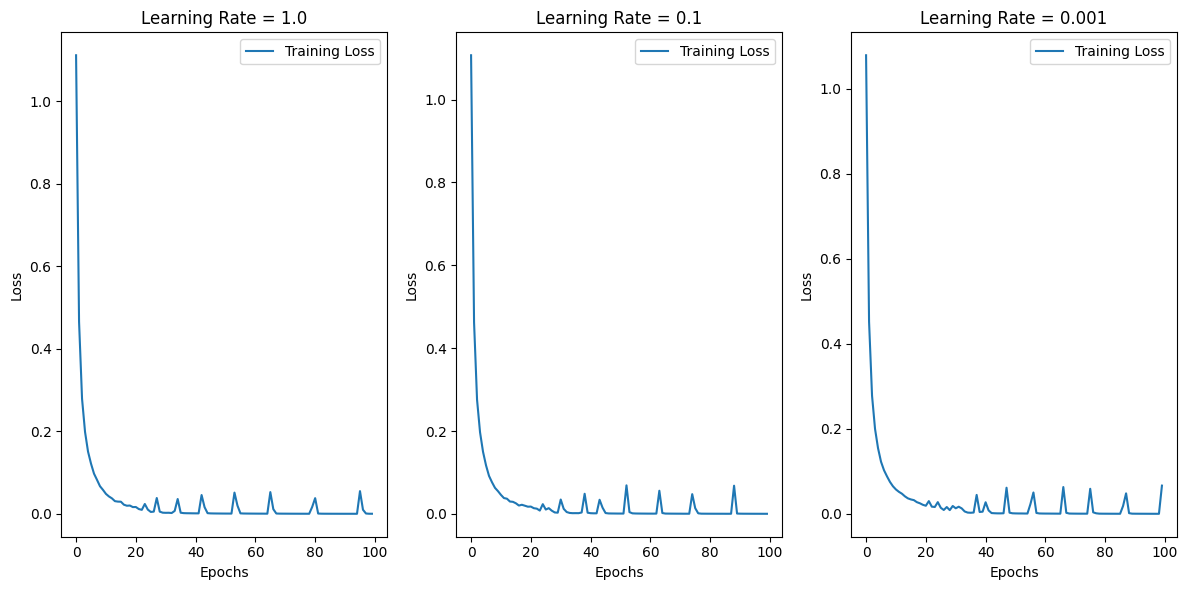

In [ ]:

# Plot the training cost w.r.t. iterations for each learning rate
plt.figure(figsize=(12, 6))
for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i+1)
    plt.plot(histories[i].history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Learning Rate = {lr}')
    plt.legend()
plt.tight_layout()
plt.show()


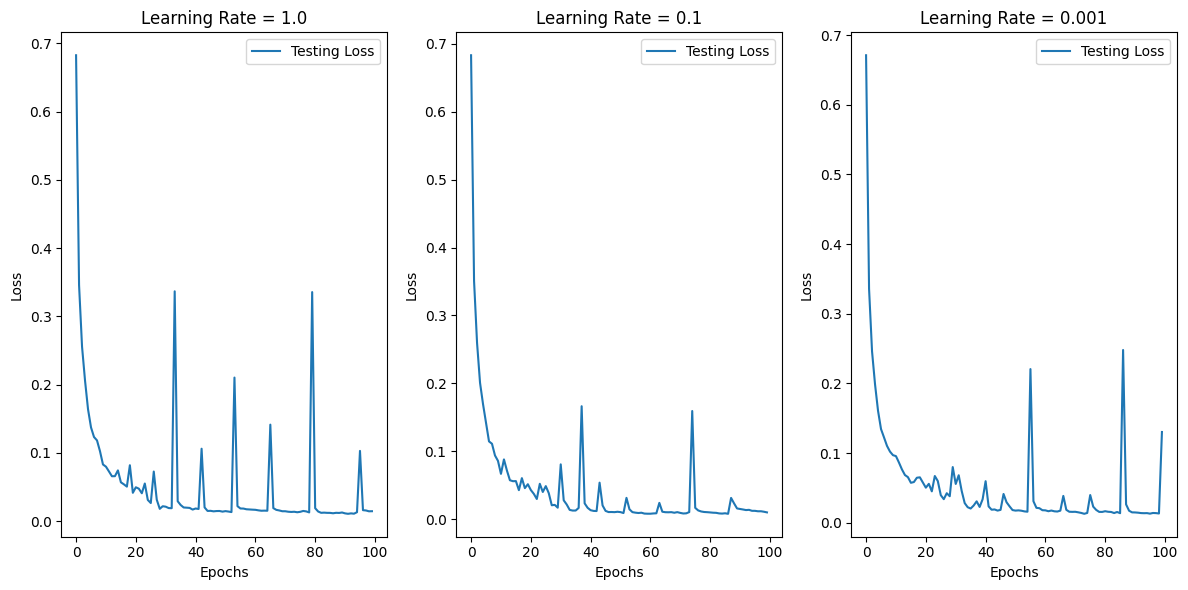

In [ ]:

# Plot the testing cost w.r.t. iterations for each learning rate
plt.figure(figsize=(12, 6))
for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i+1)
    plt.plot(histories[i].history['val_loss'], label='Testing Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Learning Rate = {lr}')
    plt.legend()
plt.tight_layout()
plt.show()


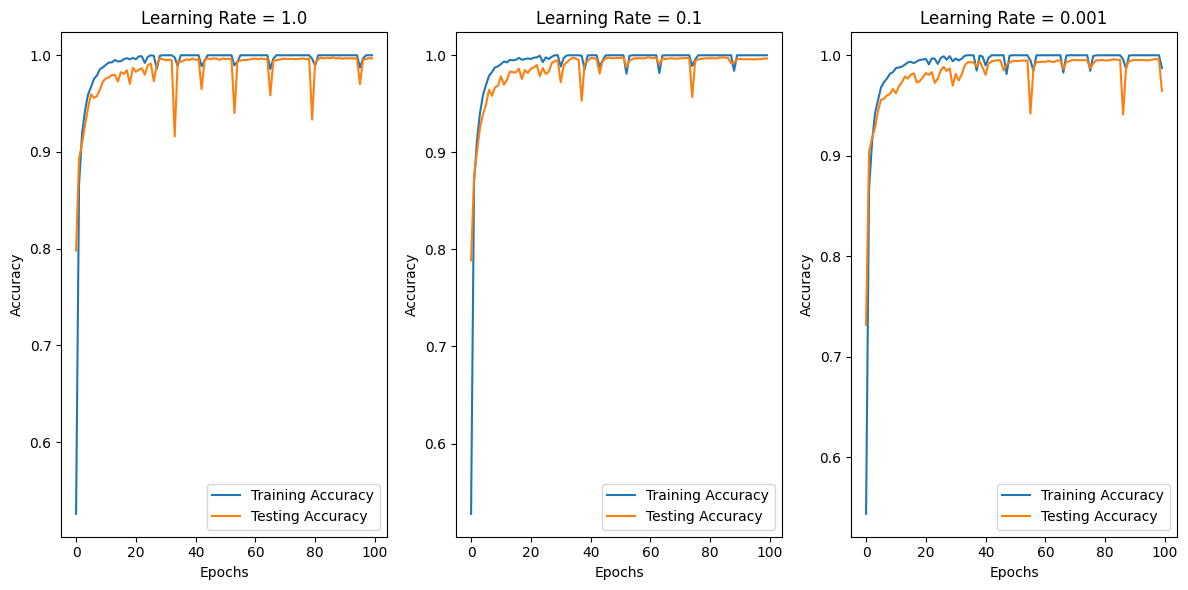

In [ ]:

# Plot the train & test accuracy scores w.r.t. iterations for each learning rate
plt.figure(figsize=(12, 6))
for i, lr in enumerate(learning_rates):
    plt.subplot(1, 3, i+1)
    plt.plot(histories[i].history['accuracy'], label='Training Accuracy')
    plt.plot(histories[i].history['val_accuracy'], label='Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Rate = {lr}')
    plt.legend()
plt.tight_layout()
plt.show()

# Create a short report discussing the influence of the learning rate on test accuracy
# Include the generated plots in your report.

# Save or display the plots and report as needed.
